### Imports

In [1]:
import pandas as pd 
from analysis_src.basic_data_inspection import StatisticsInspectionStrategy,DataTypesInspectionStrategy,DataInspector
from analysis_src.missing_value_analysis import ImplementMissingValueAnalysis
from analysis_src.univariate_analysis import NumericalUnivariateAnalysis,CategoricalUnivariateaAnalysis,UnivariateAnalyzer
from analysis_src.bivariate_analysis import NumericalvsNumericalAnalysis, CategoricalvsNumericalAnalysis ,BivariateAnalyzer
from analysis_src.multivariate_analysis import SimpleMultivariateAnalysis

### Load Data

In [2]:
data_path = "/home/himanshu/Coding/House_Price/steps/extracted_data/AmesHousing.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## EDA

### Data Type Analysis

In [4]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Datatypes and nulll value counts of the df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type     

In [5]:
data_inspector.set_strategy(StatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics for Numerical Features: 
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026  

### Missing value analysis


Missing values count by columns: 
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing values....


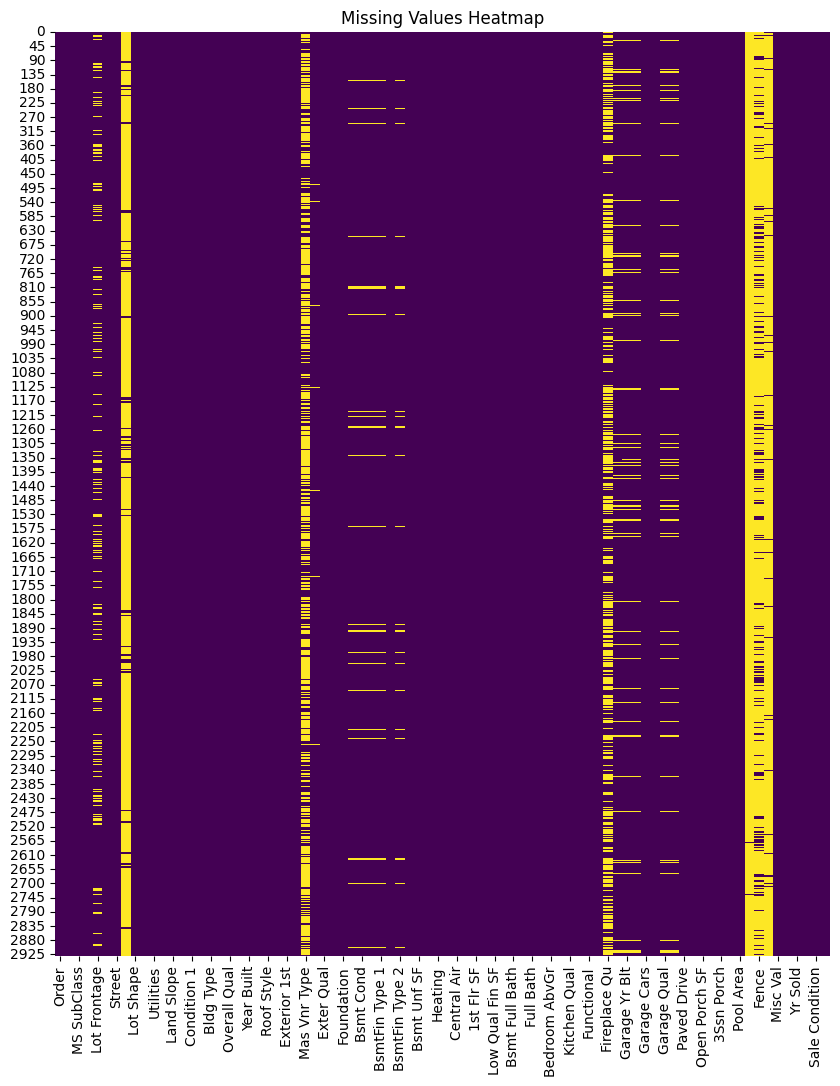

In [6]:
missing_value_analyzer = ImplementMissingValueAnalysis()

missing_value_analyzer.analyze(df)

### Univariate Analysis

#### Numerical Categoreies

In [7]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())

In [8]:
num_col = df.select_dtypes(include = ['int','float'])

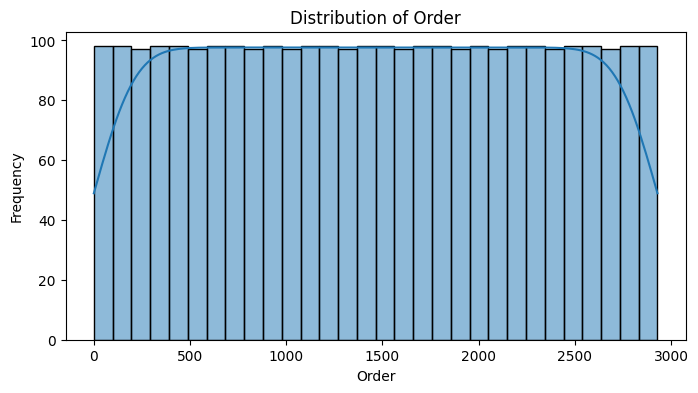

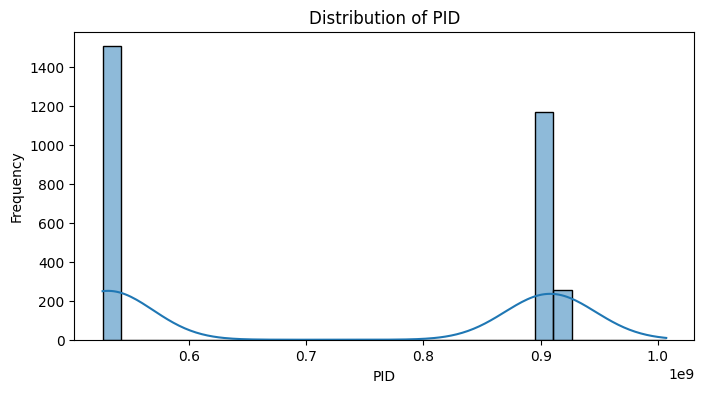

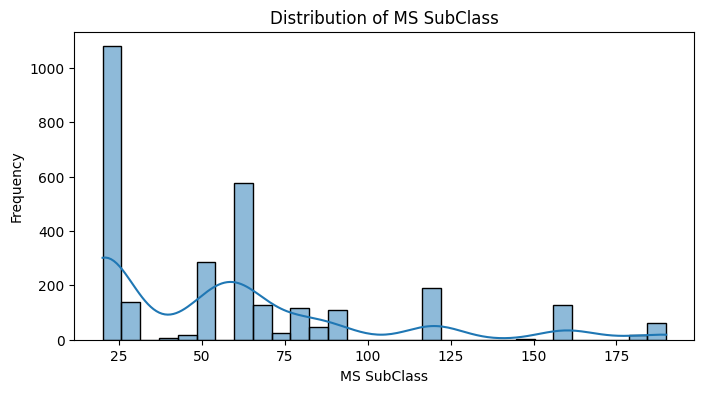

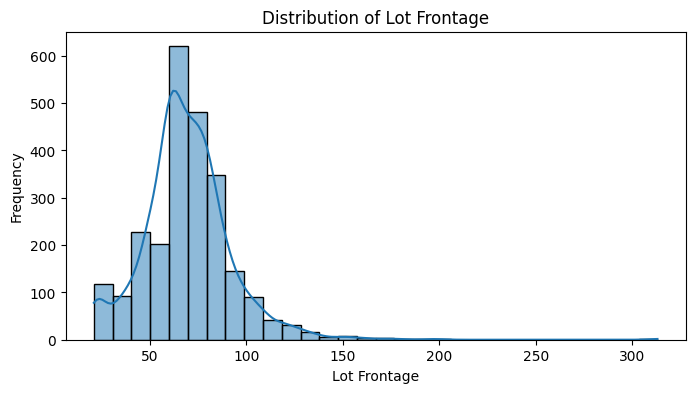

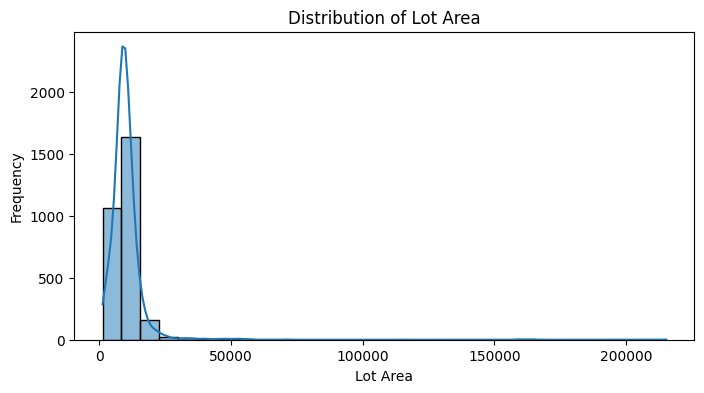

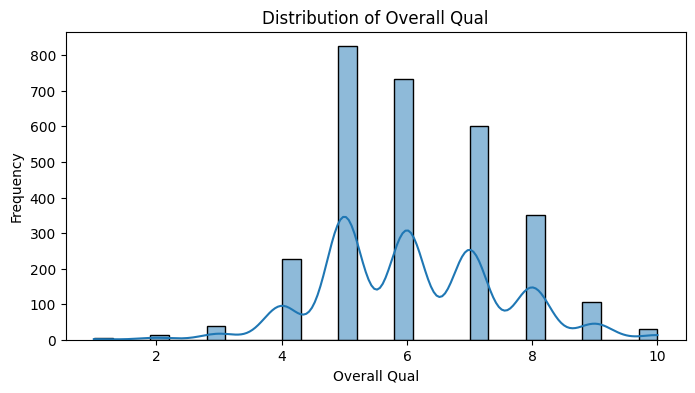

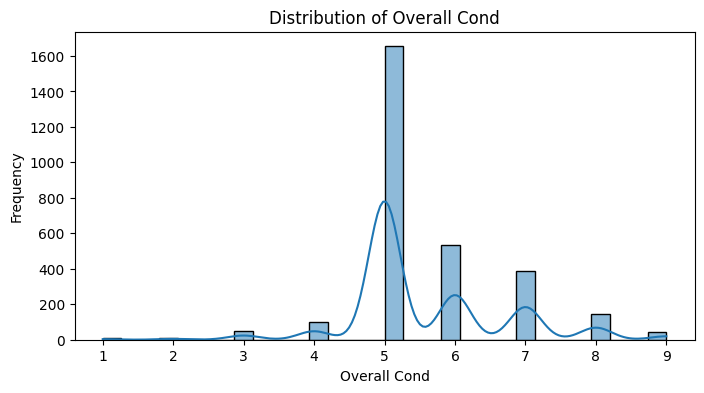

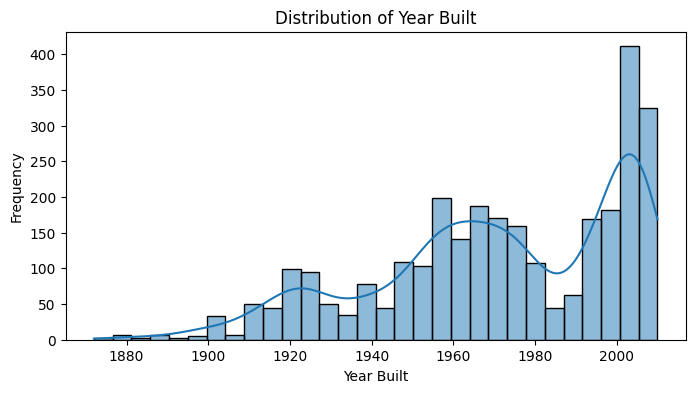

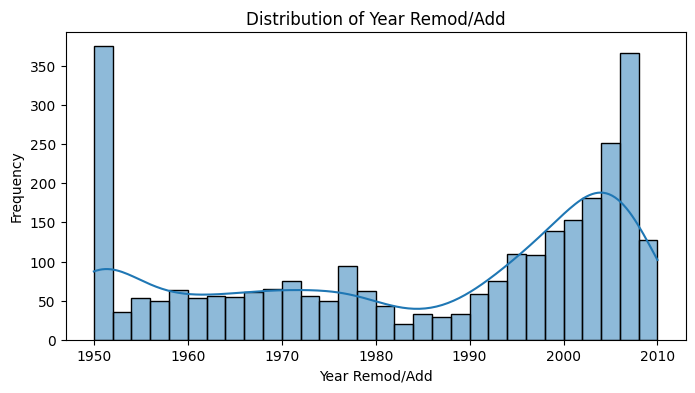

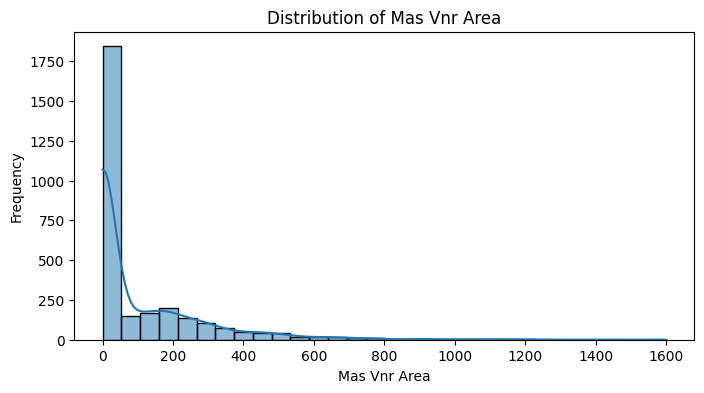

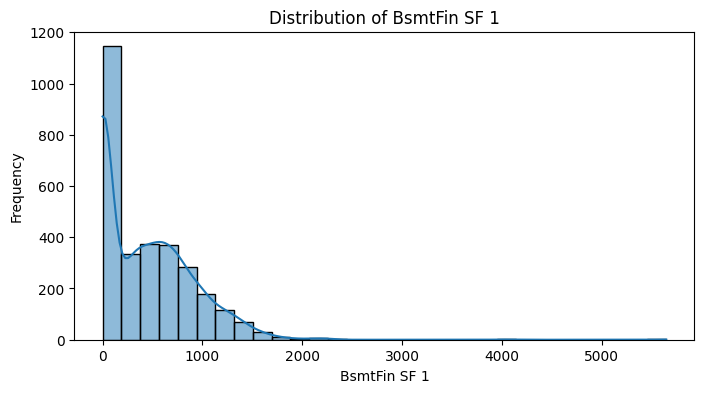

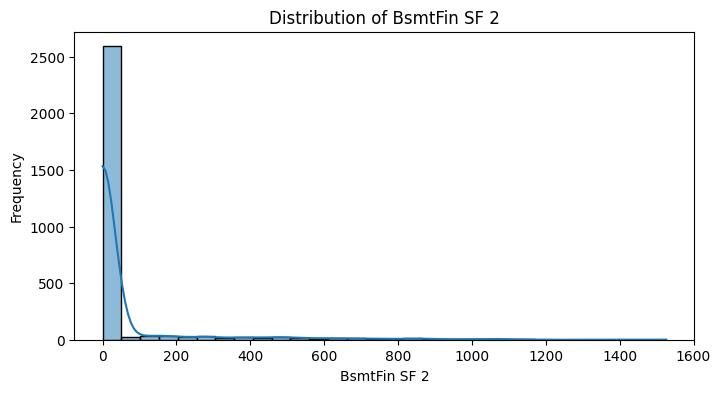

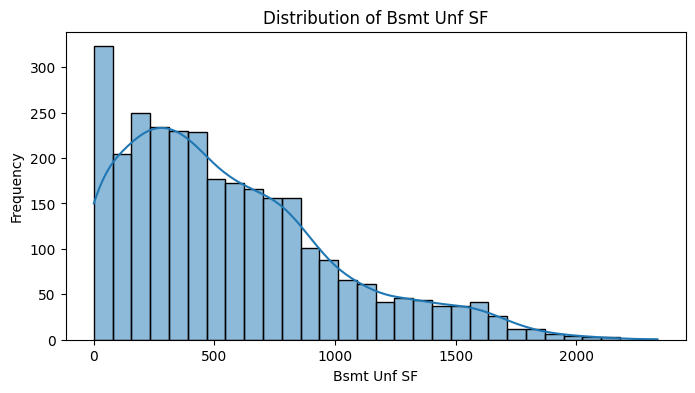

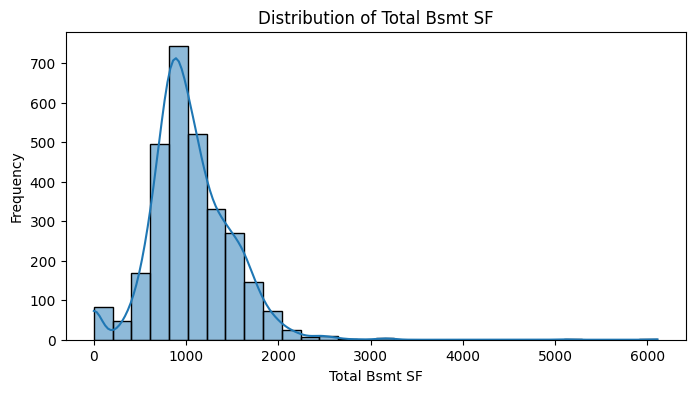

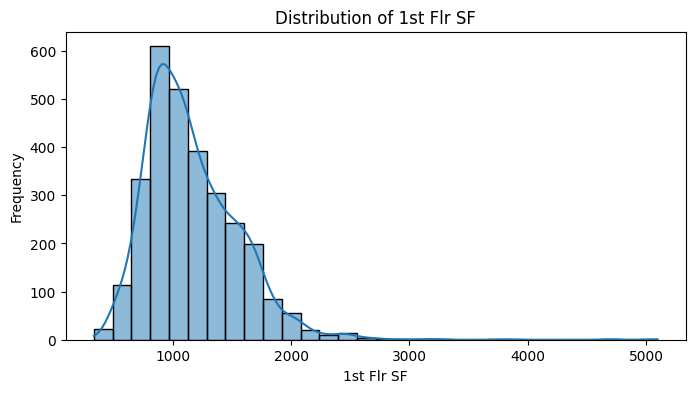

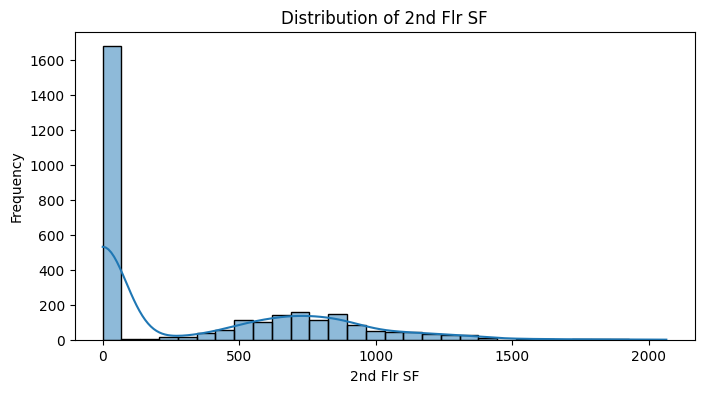

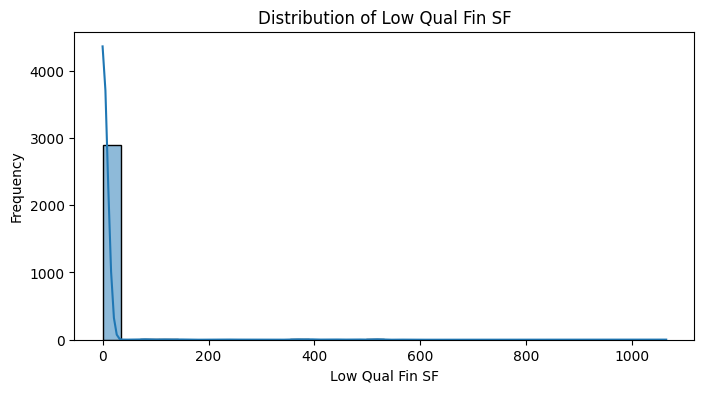

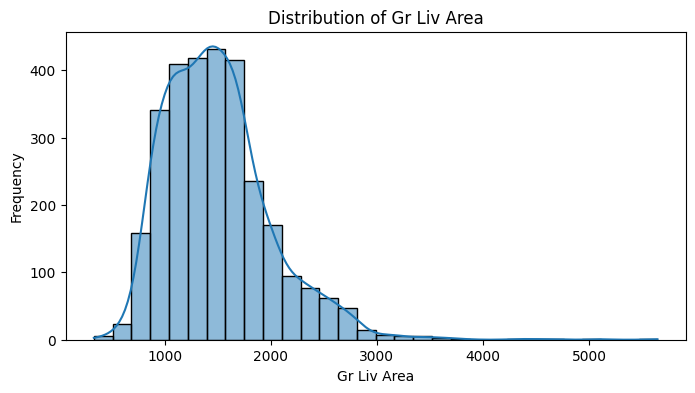

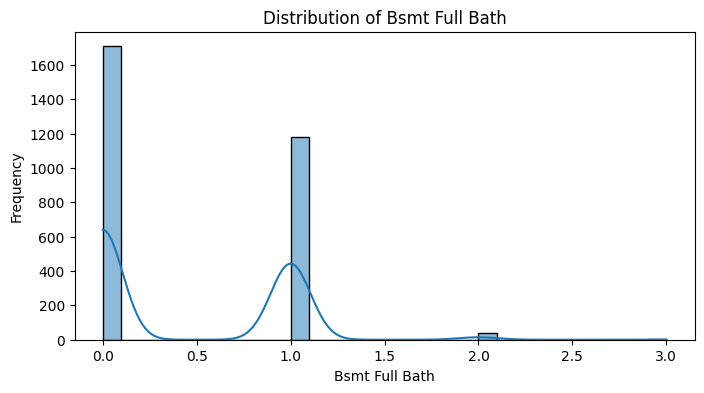

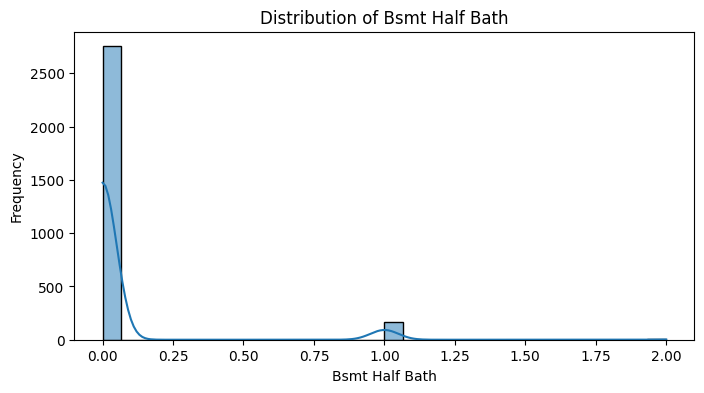

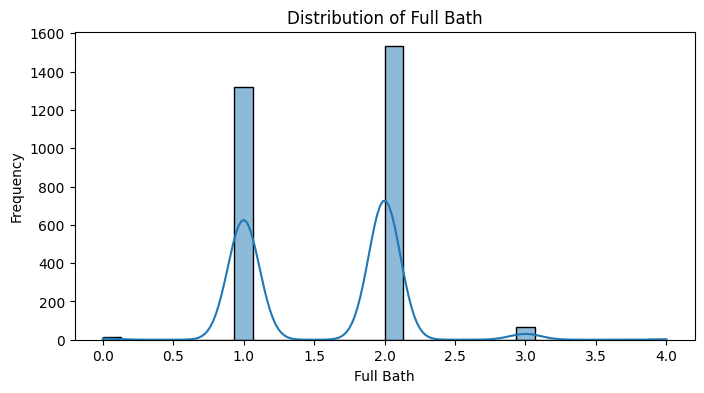

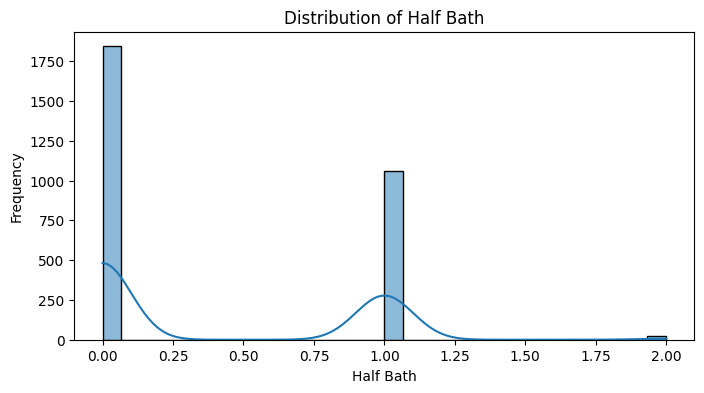

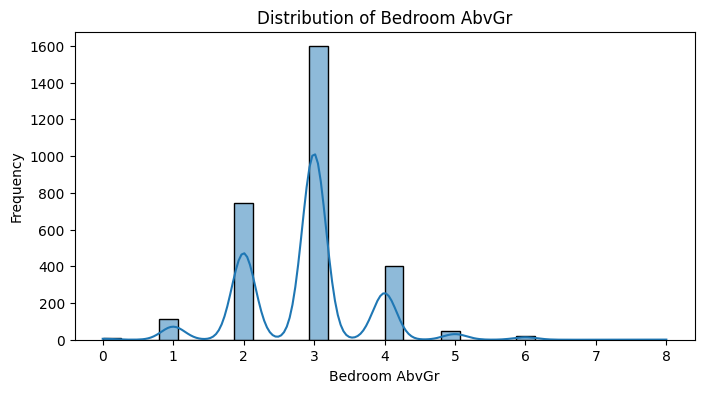

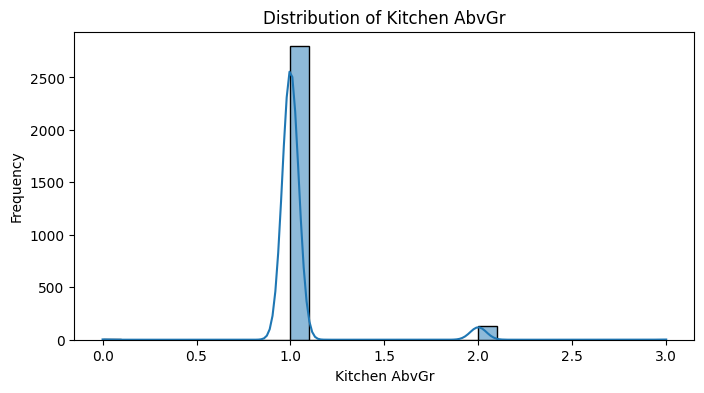

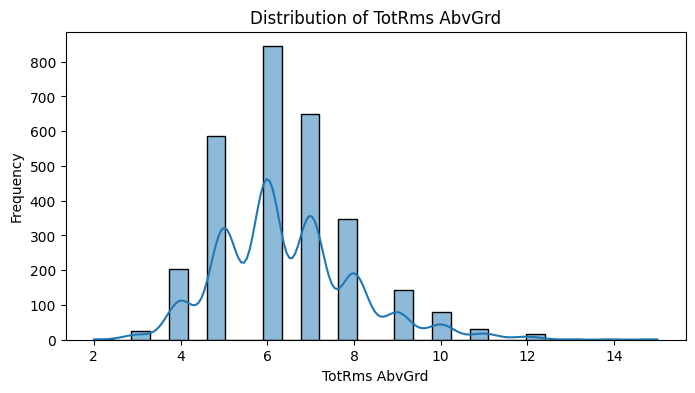

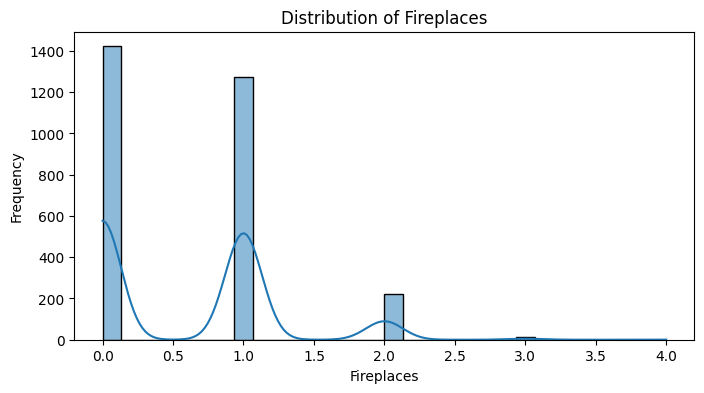

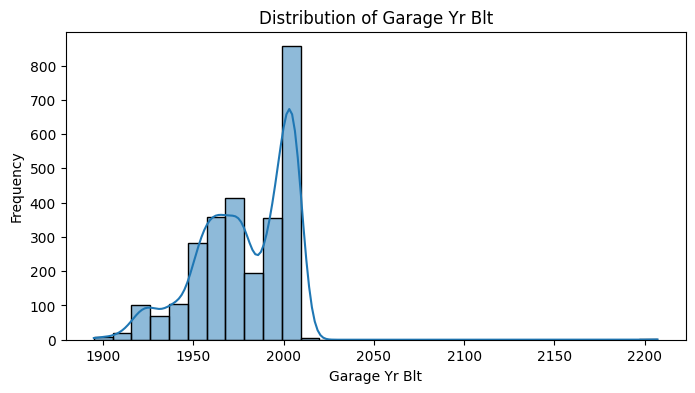

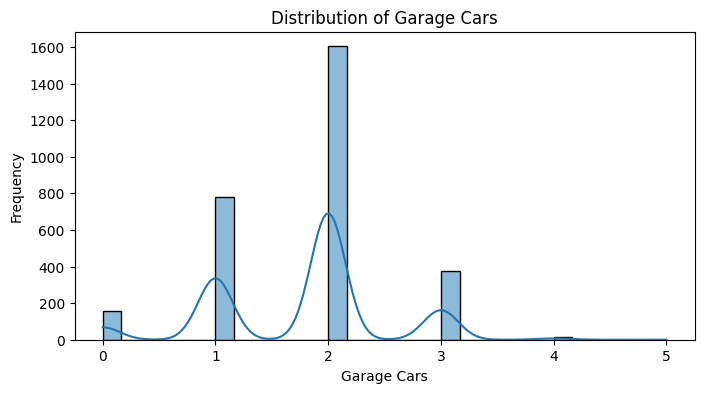

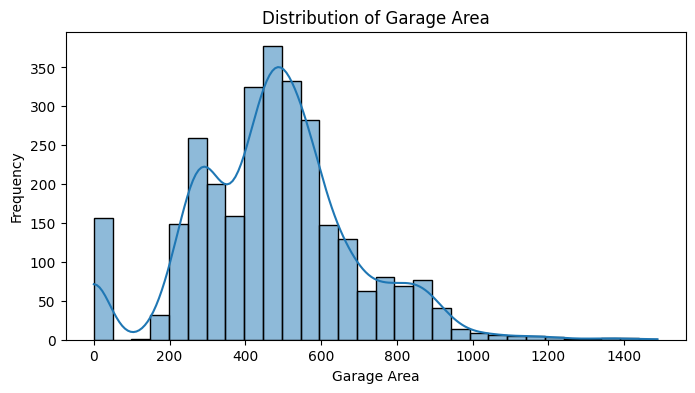

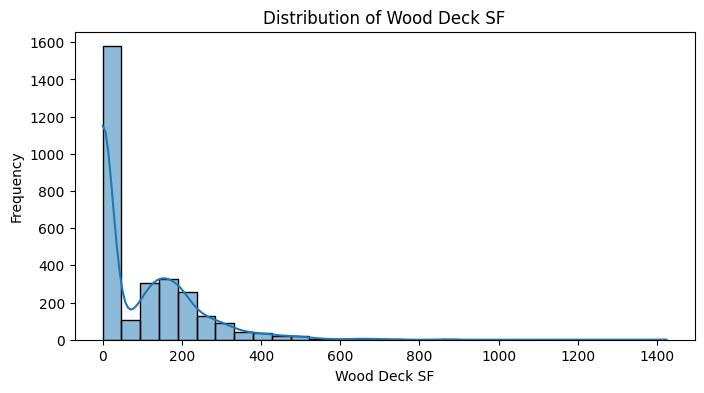

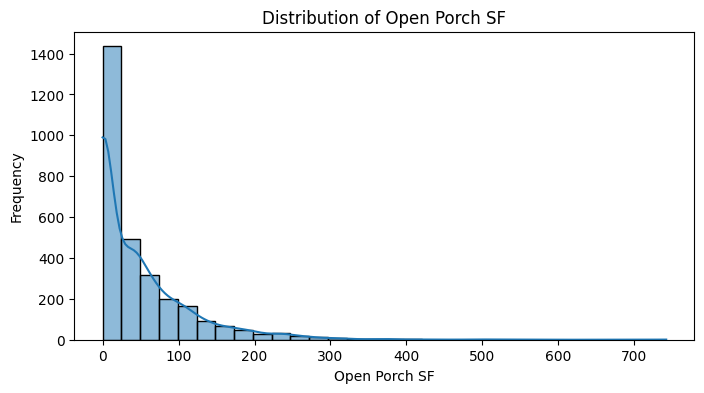

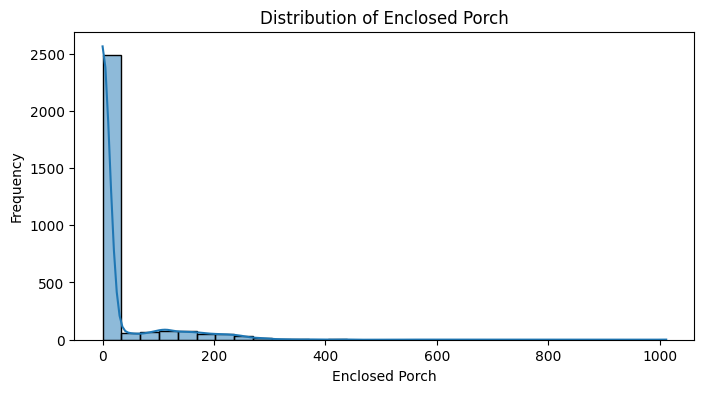

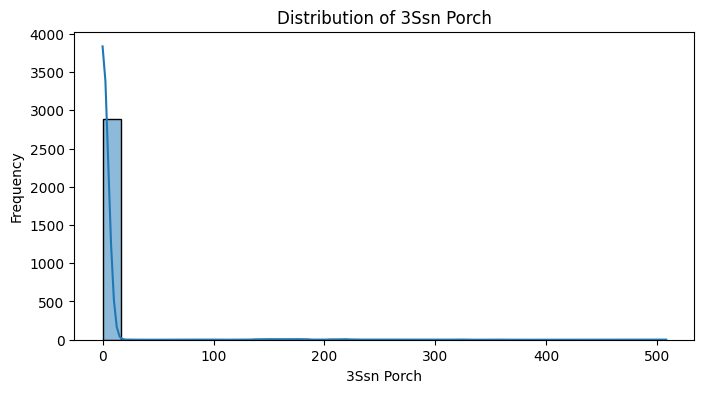

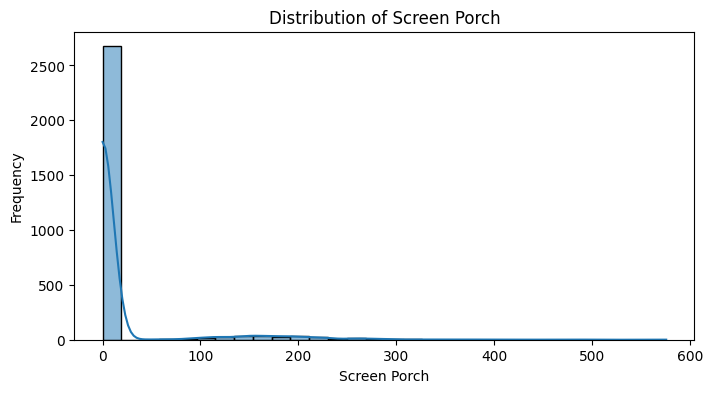

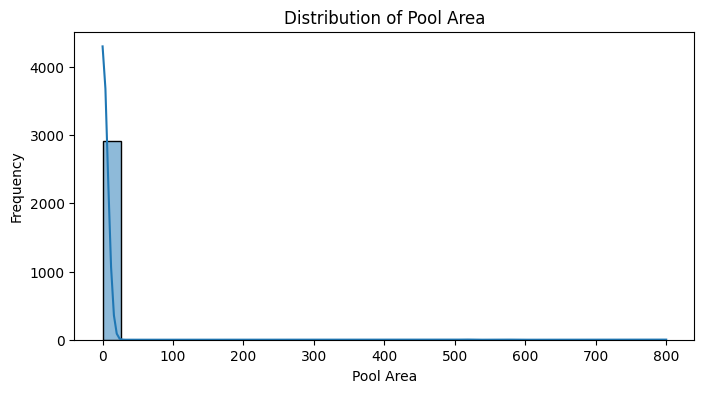

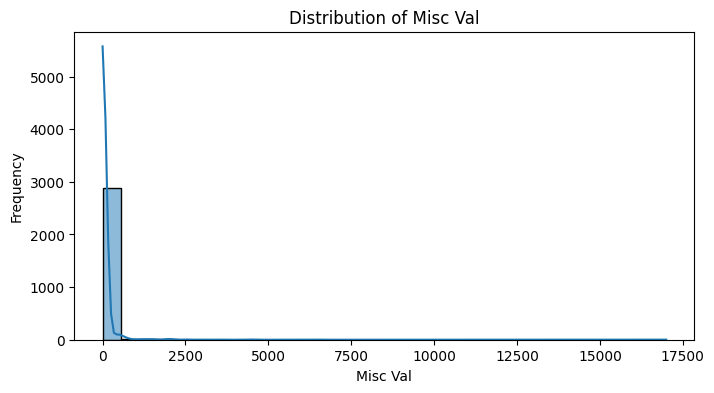

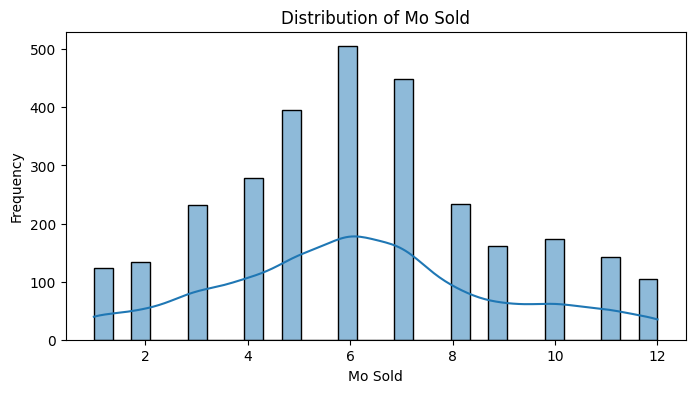

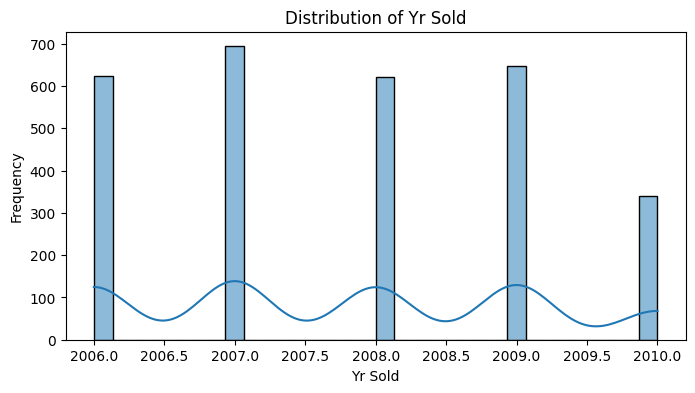

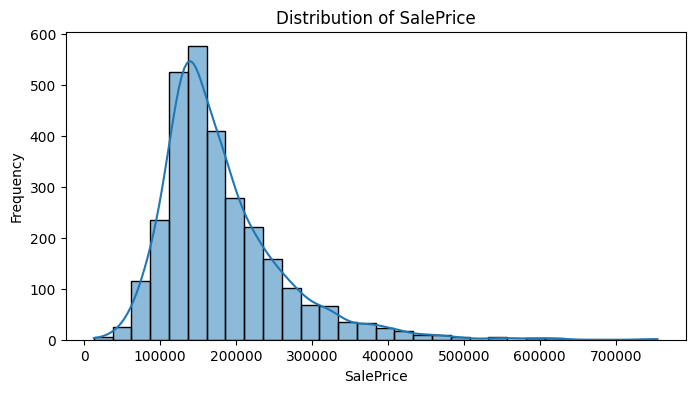

In [9]:
for column in num_col.columns:
    univariate_analyzer.execute_strategy(df,column)

#### Categorical Features

In [10]:
cat_cols = df.select_dtypes(include=["object"])
print(cat_cols.columns)

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [11]:
univariate_analyzer.set_strategy(CategoricalUnivariateaAnalysis())

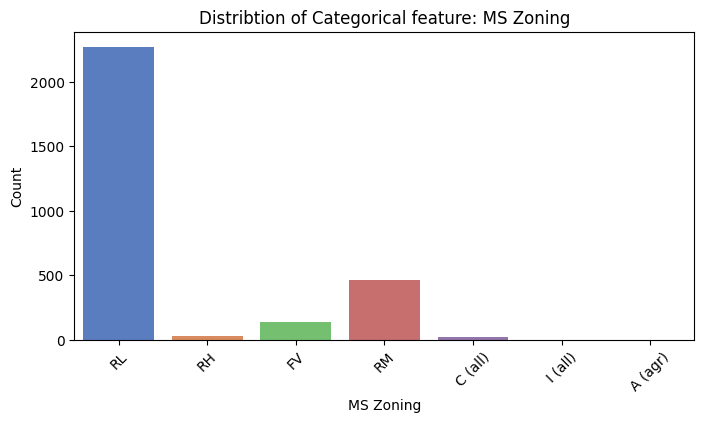

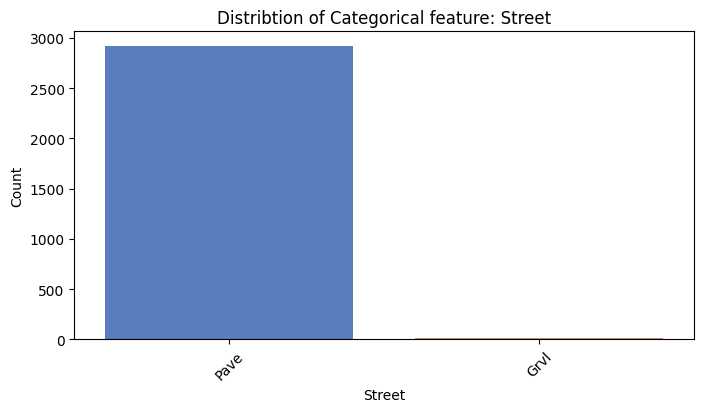

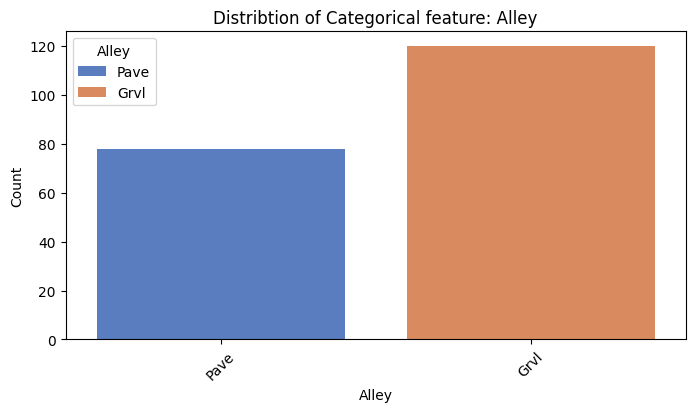

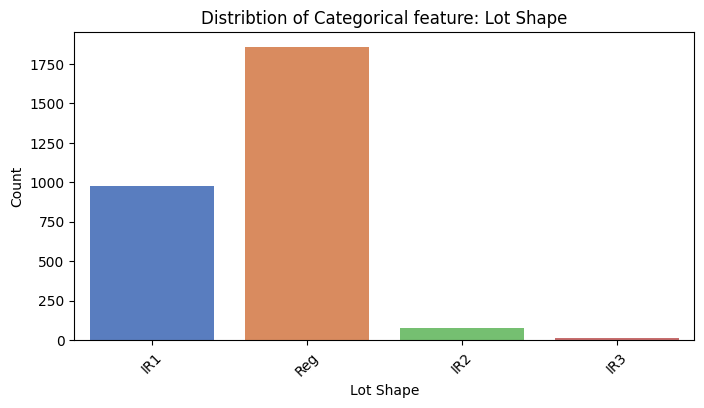

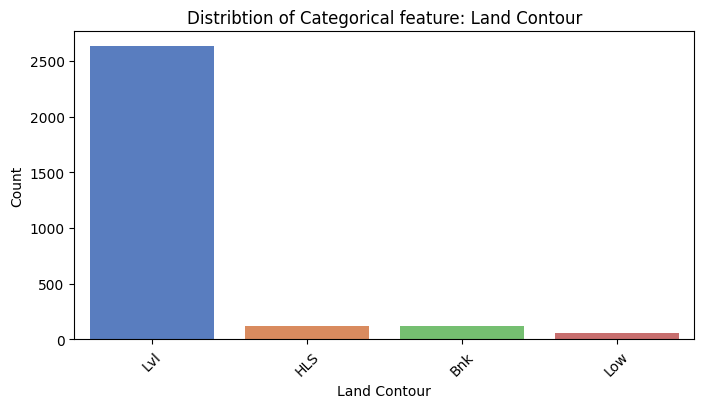

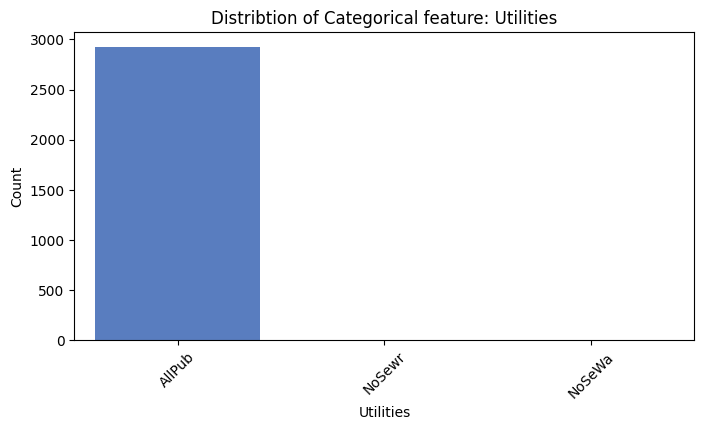

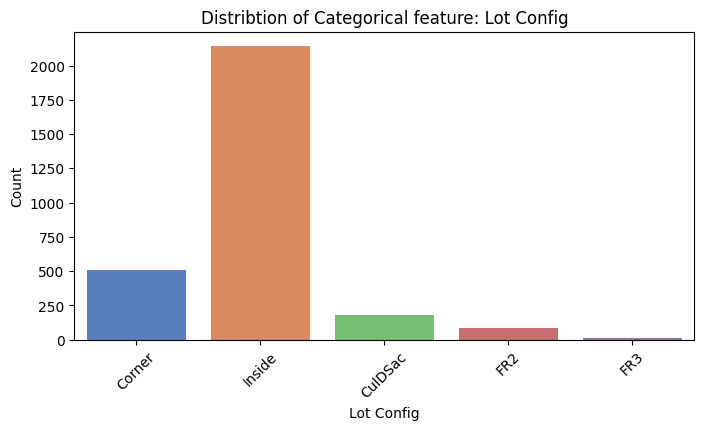

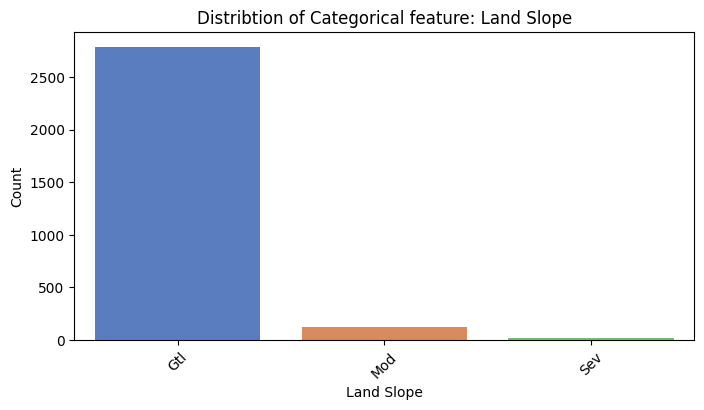

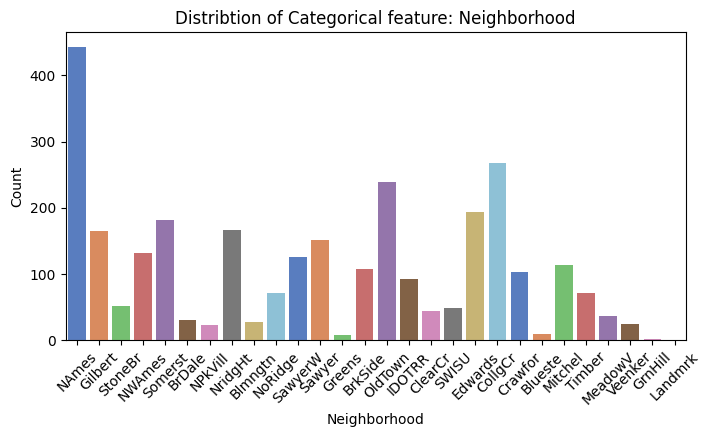

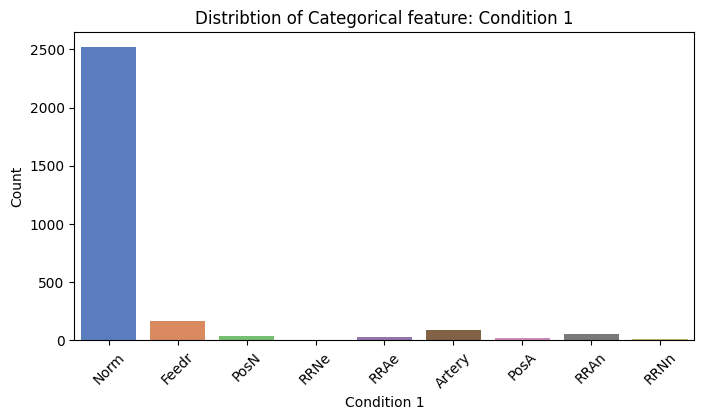

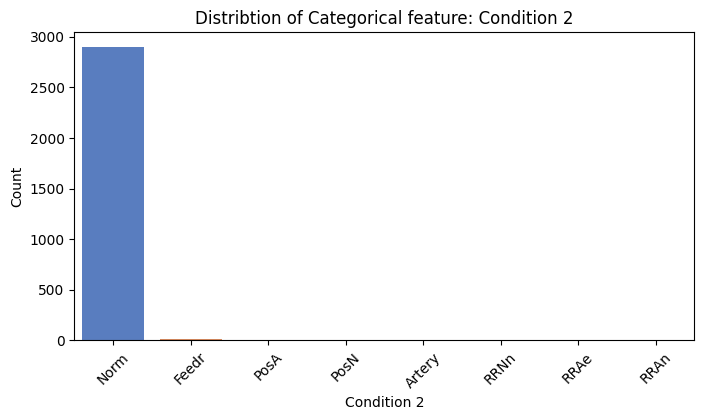

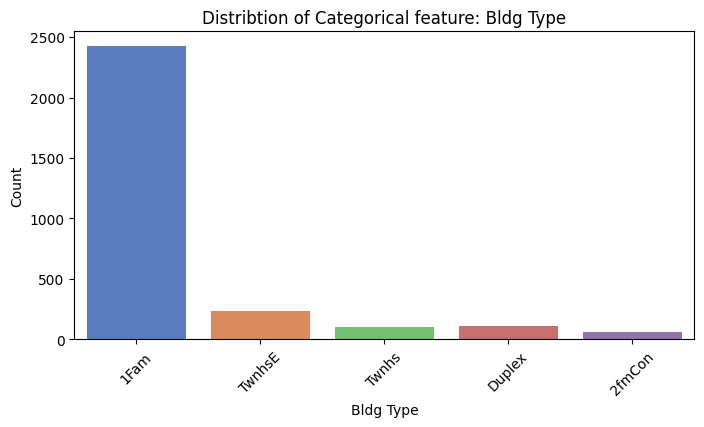

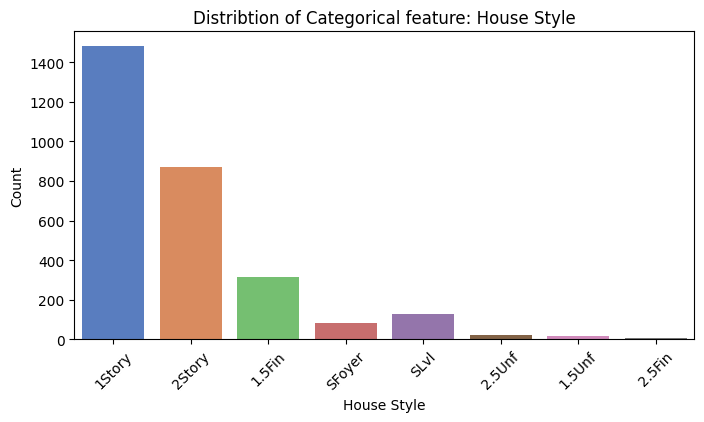

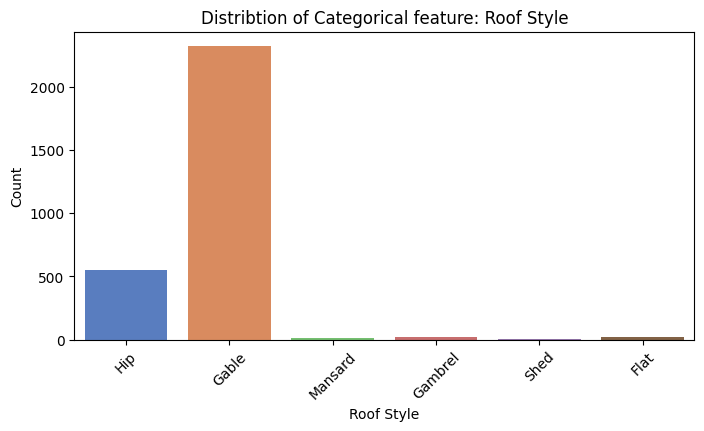

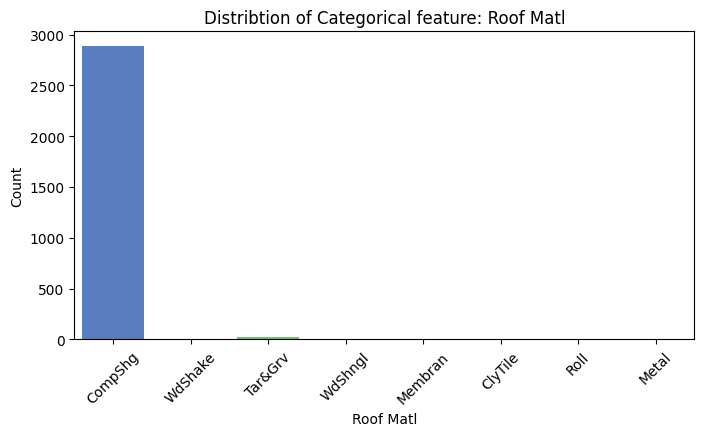

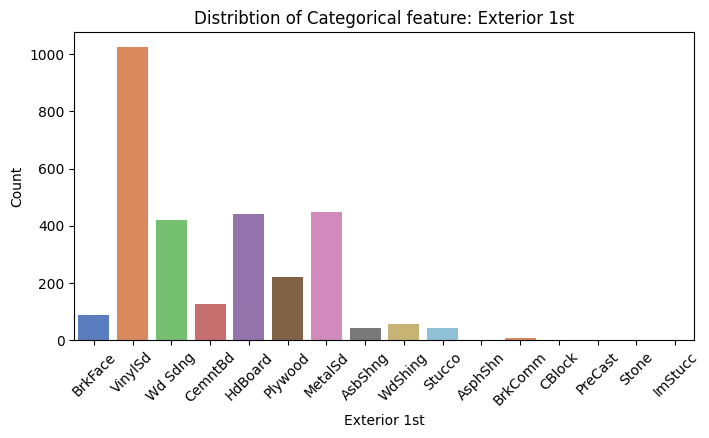

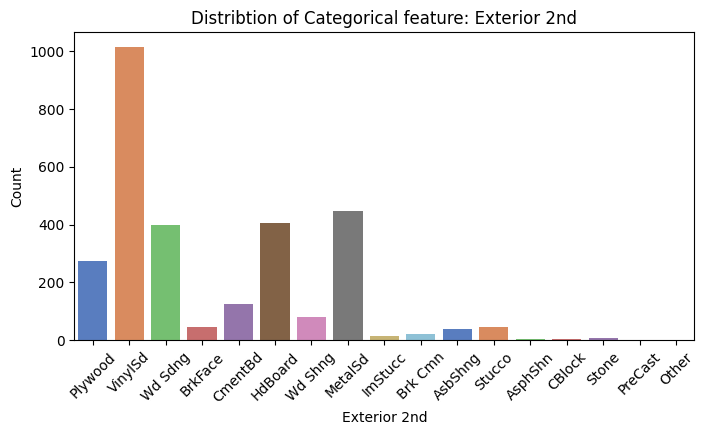

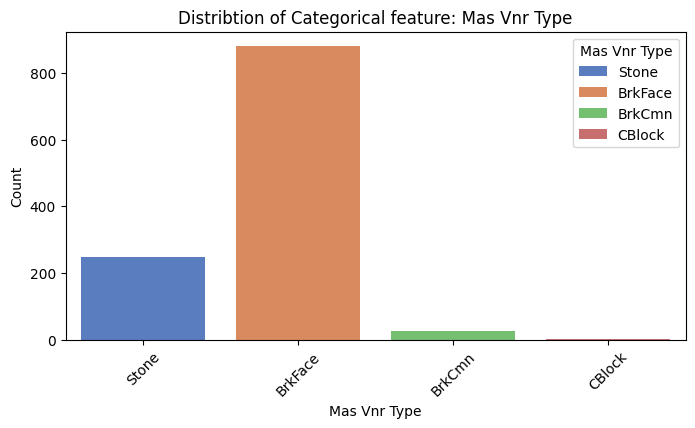

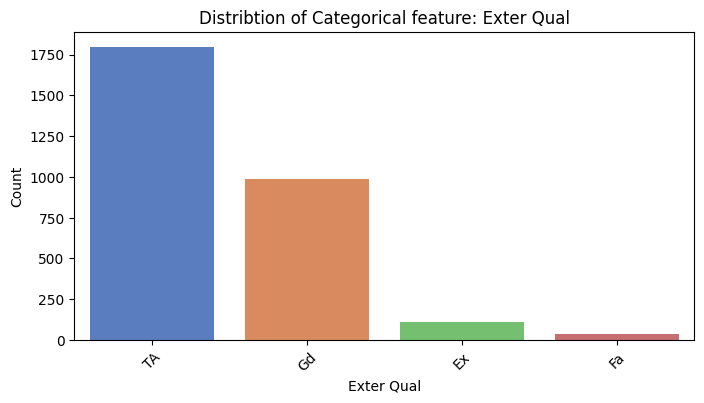

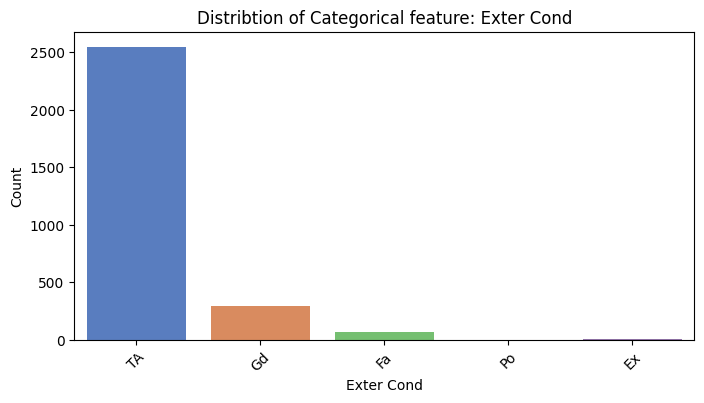

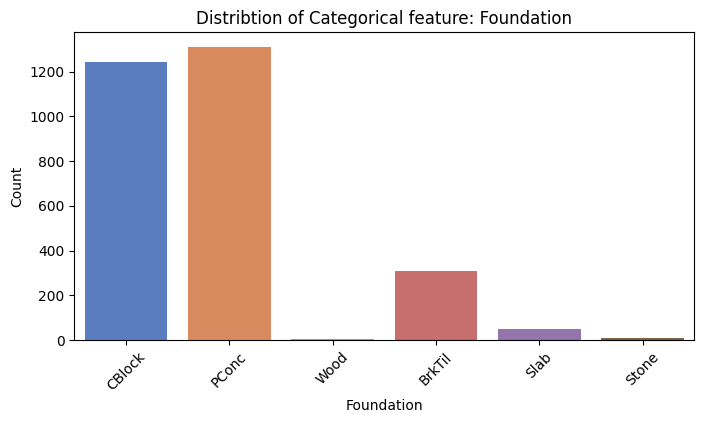

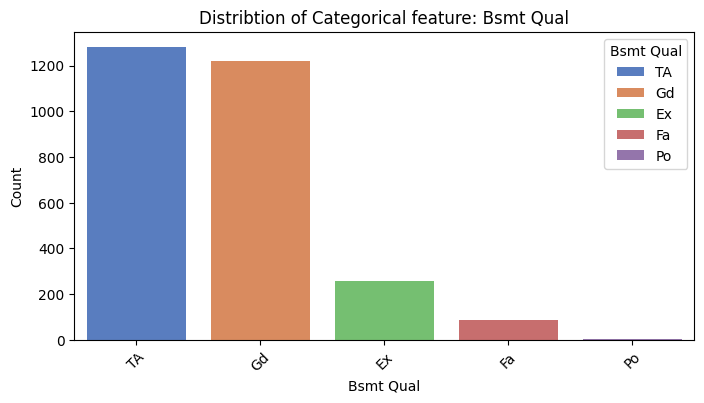

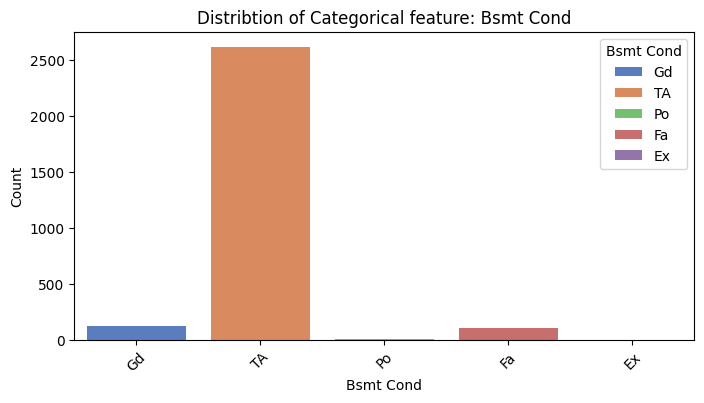

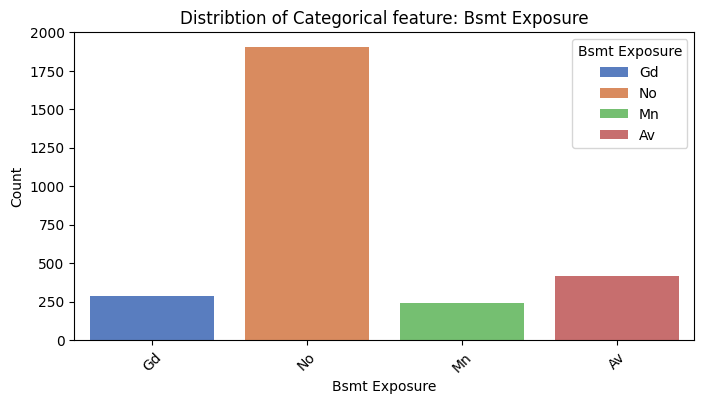

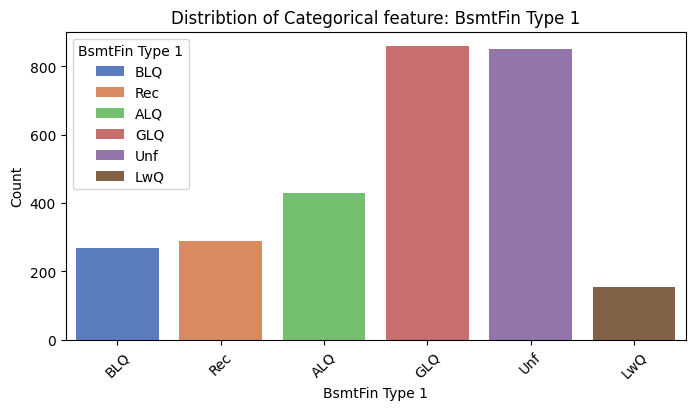

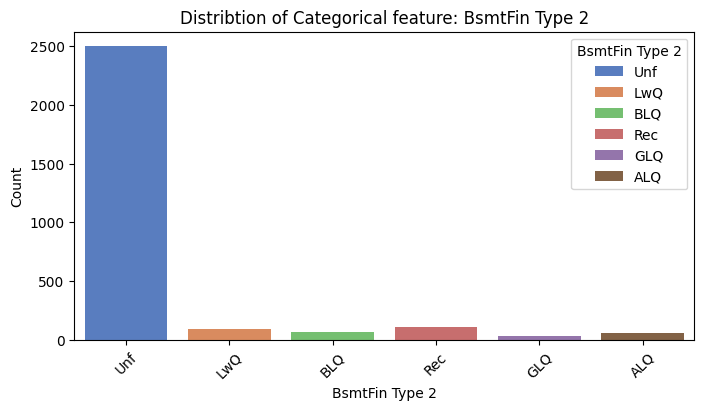

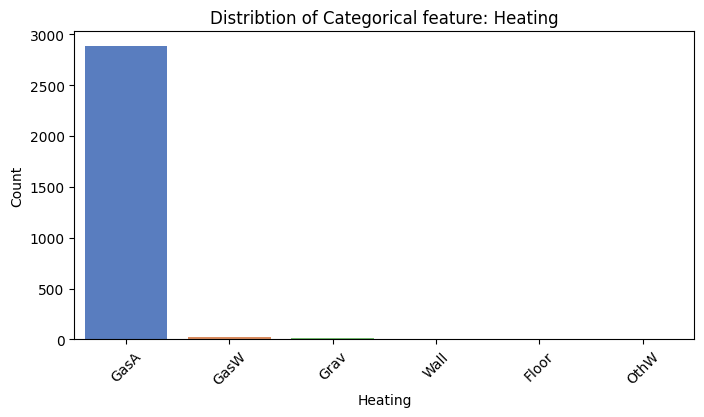

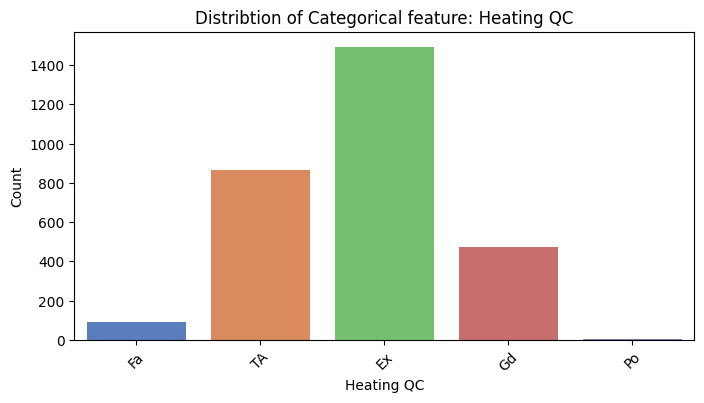

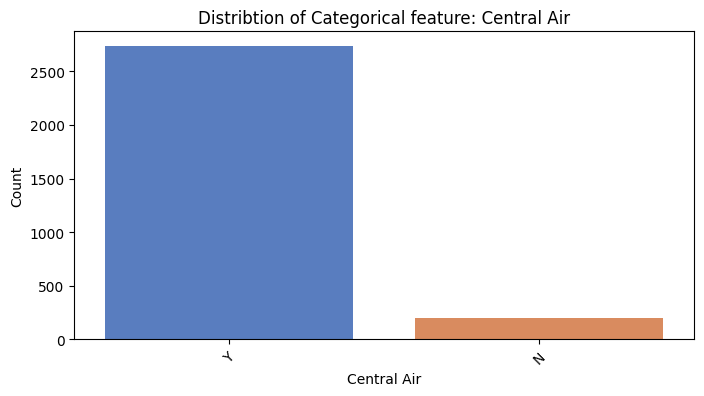

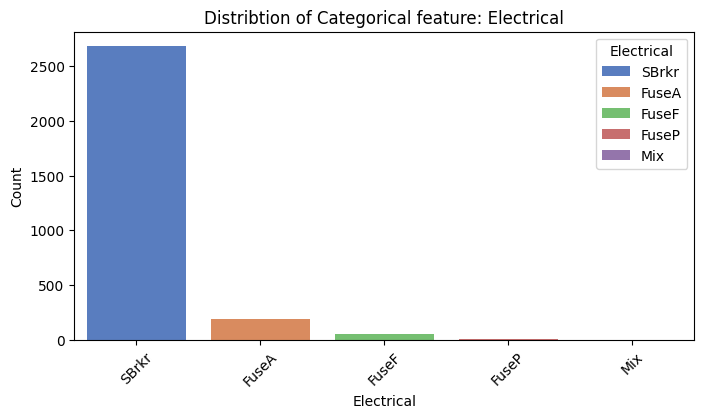

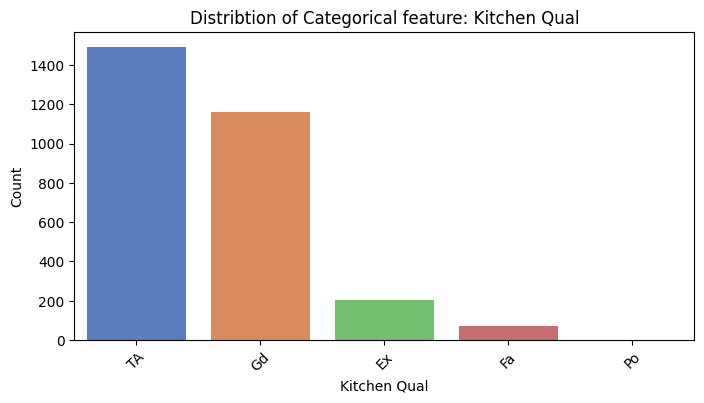

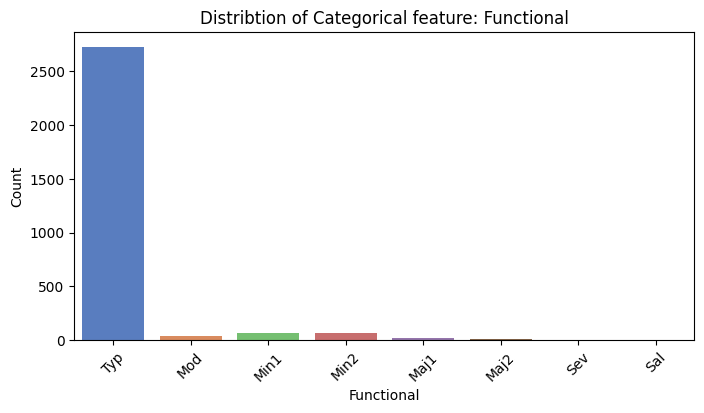

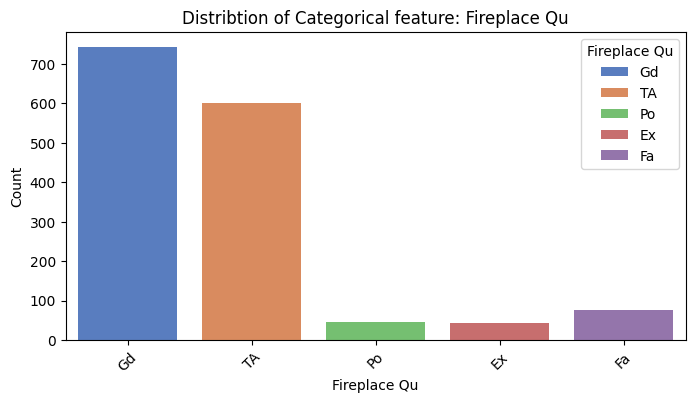

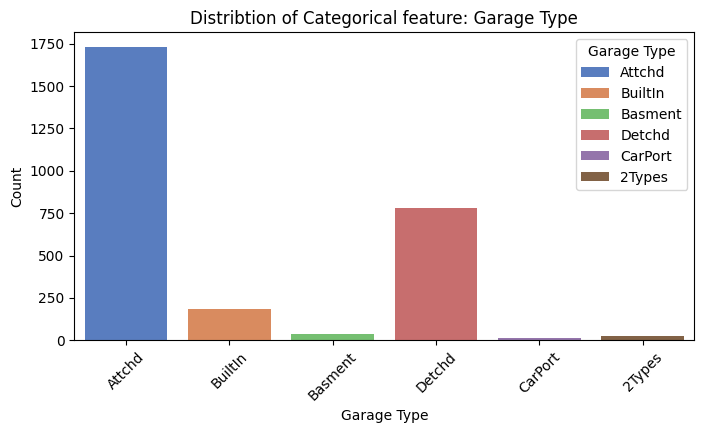

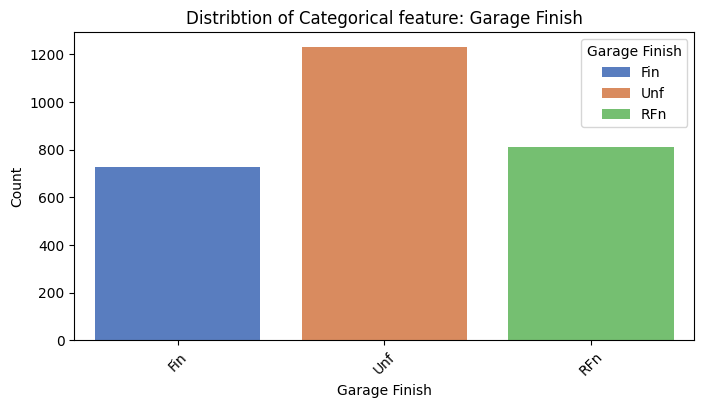

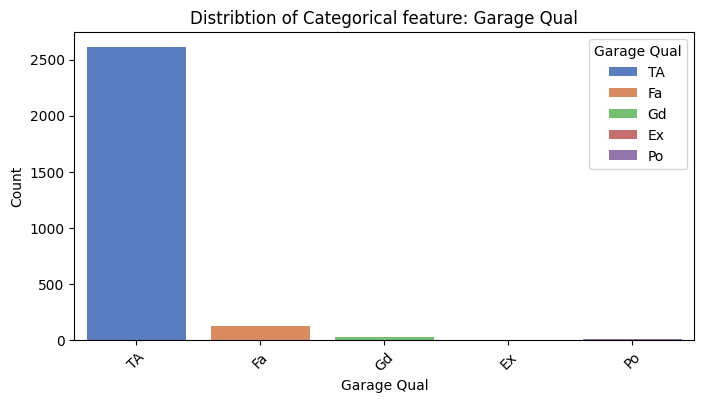

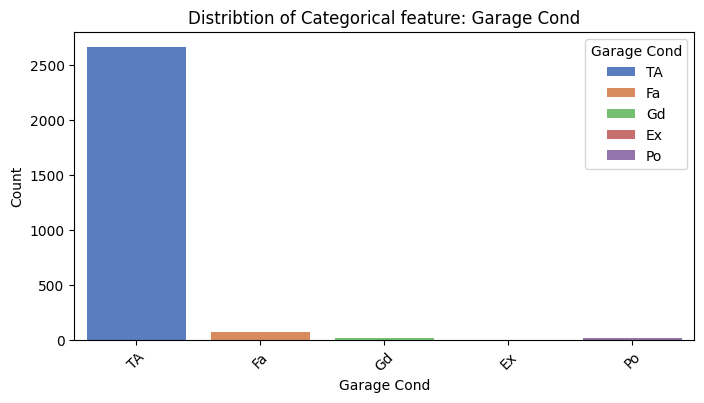

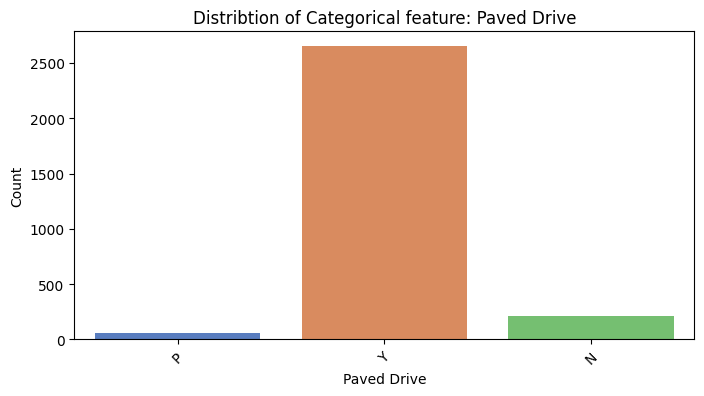

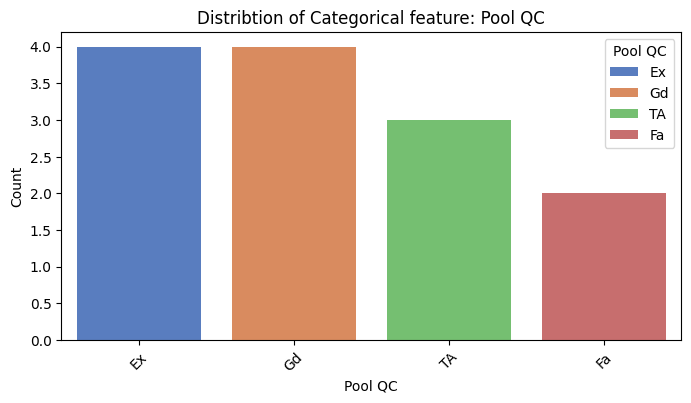

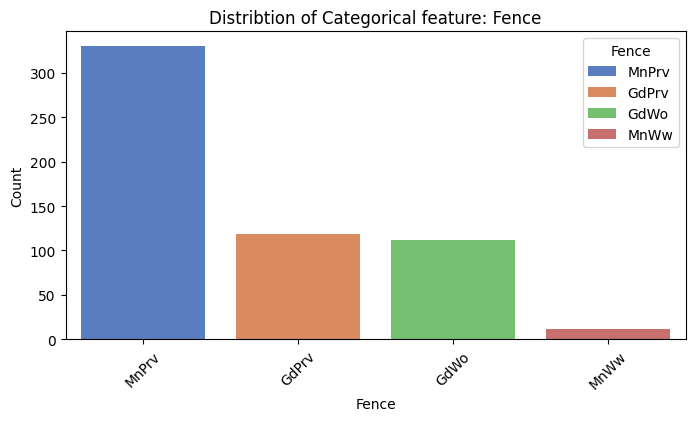

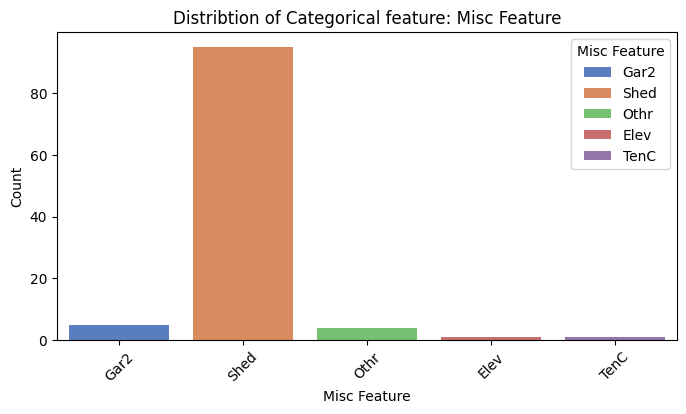

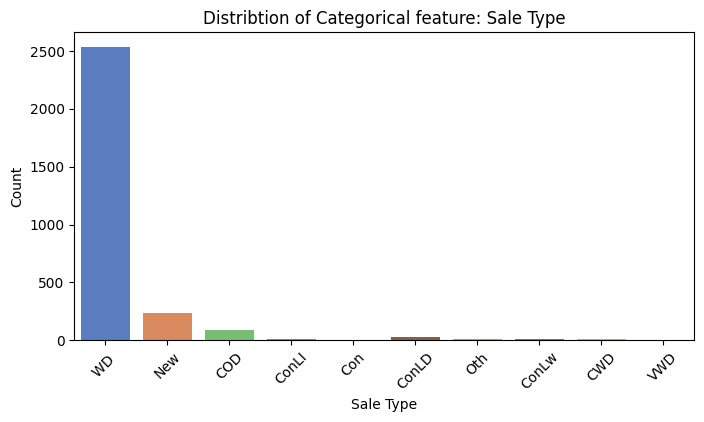

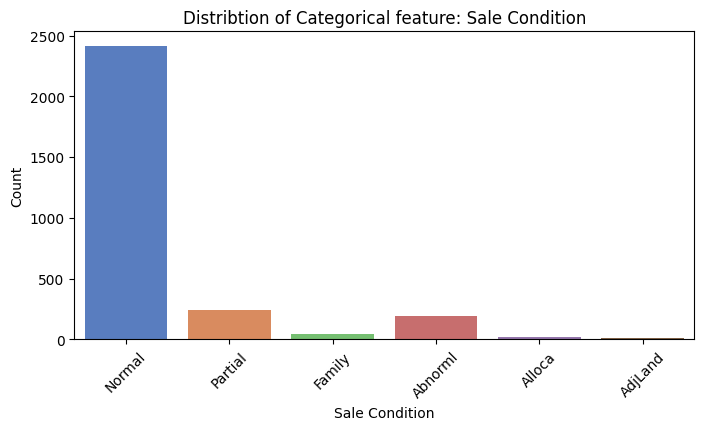

In [12]:
for column in cat_cols.columns:
    univariate_analyzer.execute_strategy(df,column)

### Bivariate Analysis

In [13]:
bivariate_analyzer = BivariateAnalyzer(NumericalvsNumericalAnalysis())

In [14]:
num_col.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

#### Numerical Vs Numerical Features

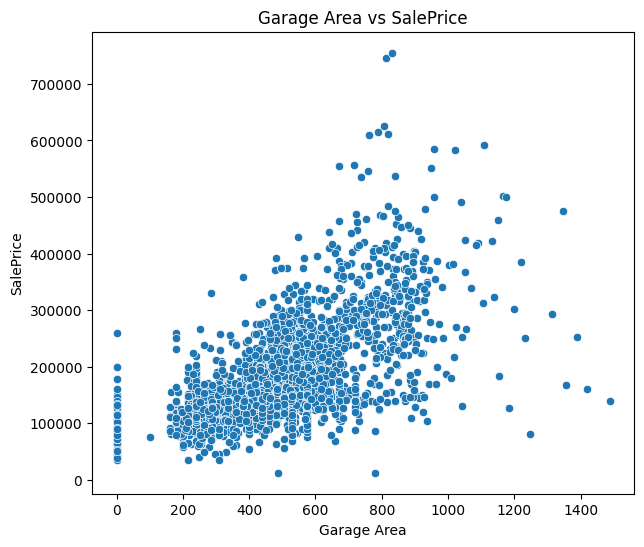

In [15]:
bivariate_analyzer.execute_strategy(df,"Garage Area","SalePrice")

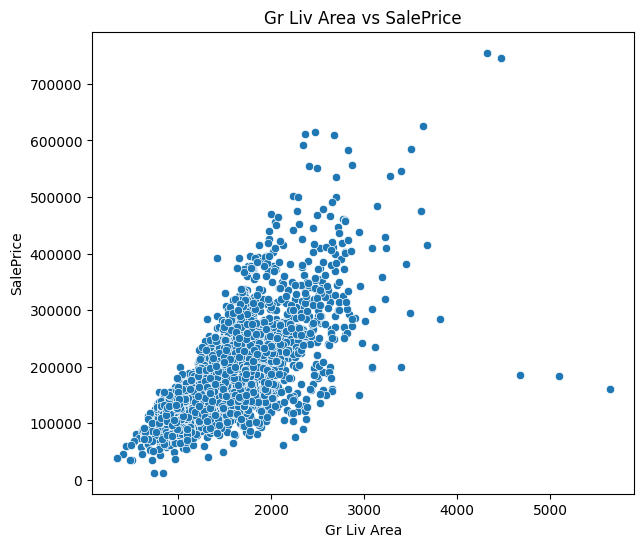

In [16]:
bivariate_analyzer.execute_strategy(df,"Gr Liv Area","SalePrice")

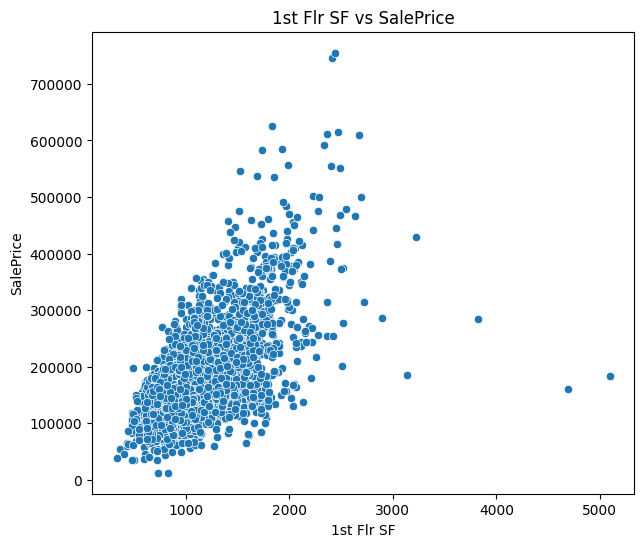

In [17]:
bivariate_analyzer.execute_strategy(df,"1st Flr SF","SalePrice")

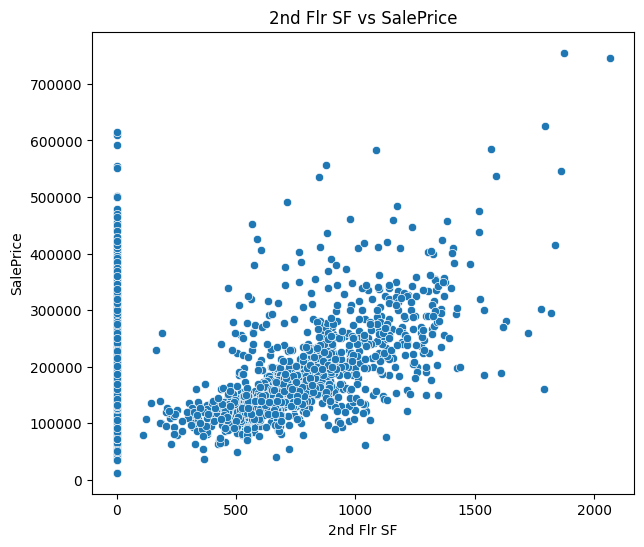

In [18]:
bivariate_analyzer.execute_strategy(df,"2nd Flr SF","SalePrice")

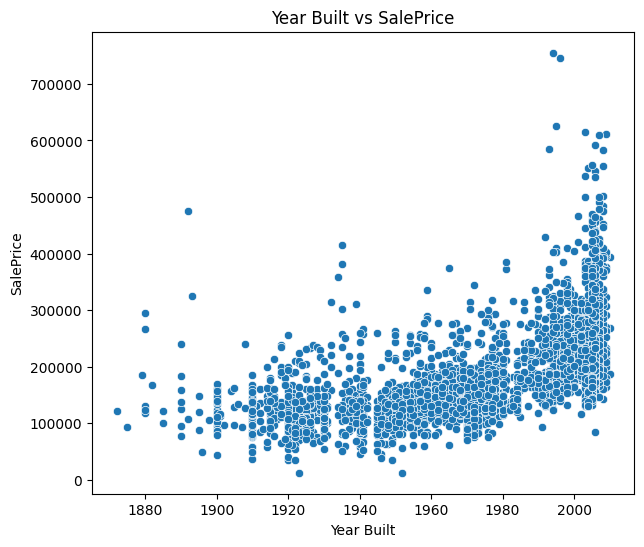

In [19]:
bivariate_analyzer.execute_strategy(df,"Year Built","SalePrice")

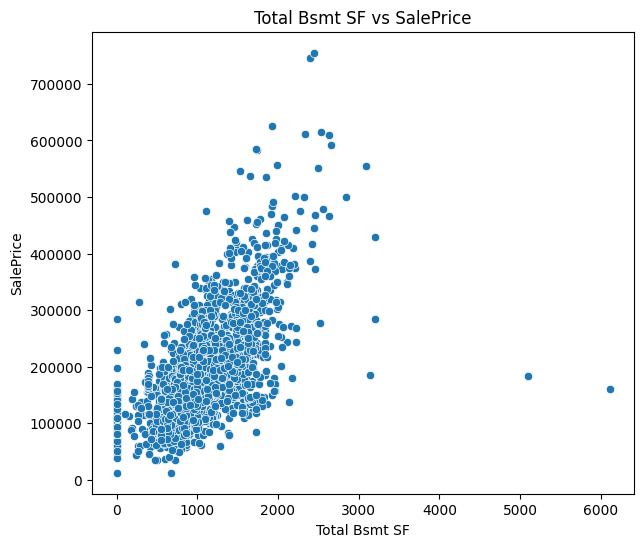

In [20]:
bivariate_analyzer.execute_strategy(df,"Total Bsmt SF","SalePrice")

#### Categorical Vs Numerical Analysis

In [21]:
num_col.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [22]:
bivariate_categorical = BivariateAnalyzer(CategoricalvsNumericalAnalysis())

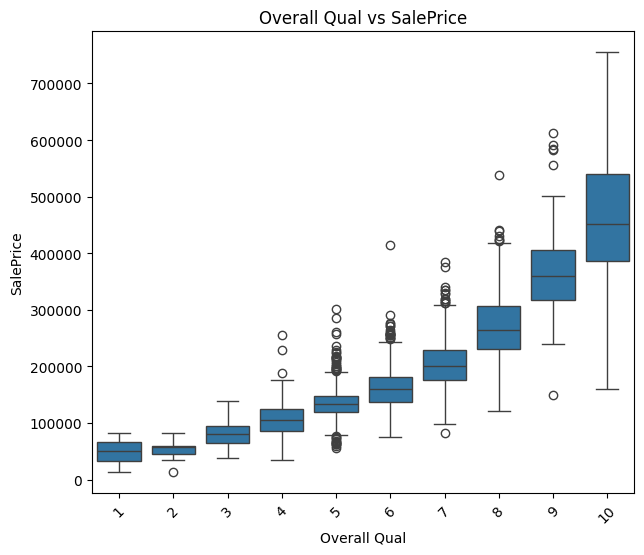

In [23]:
bivariate_categorical.execute_strategy(df,"Overall Qual","SalePrice")

### Multivariate Analysis


In [24]:
multivariate_Analyzer = SimpleMultivariateAnalysis()

In [25]:
selected_features = df[["SalePrice","Gr Liv Area","Overall Qual","Total Bsmt SF","Year Built"]]

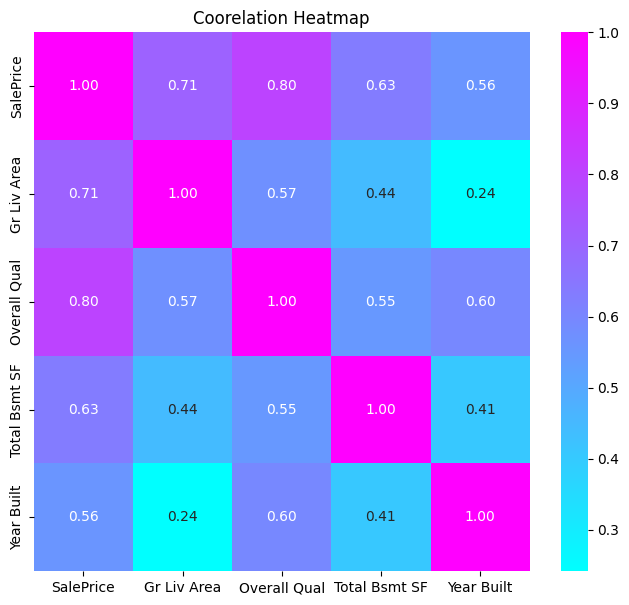

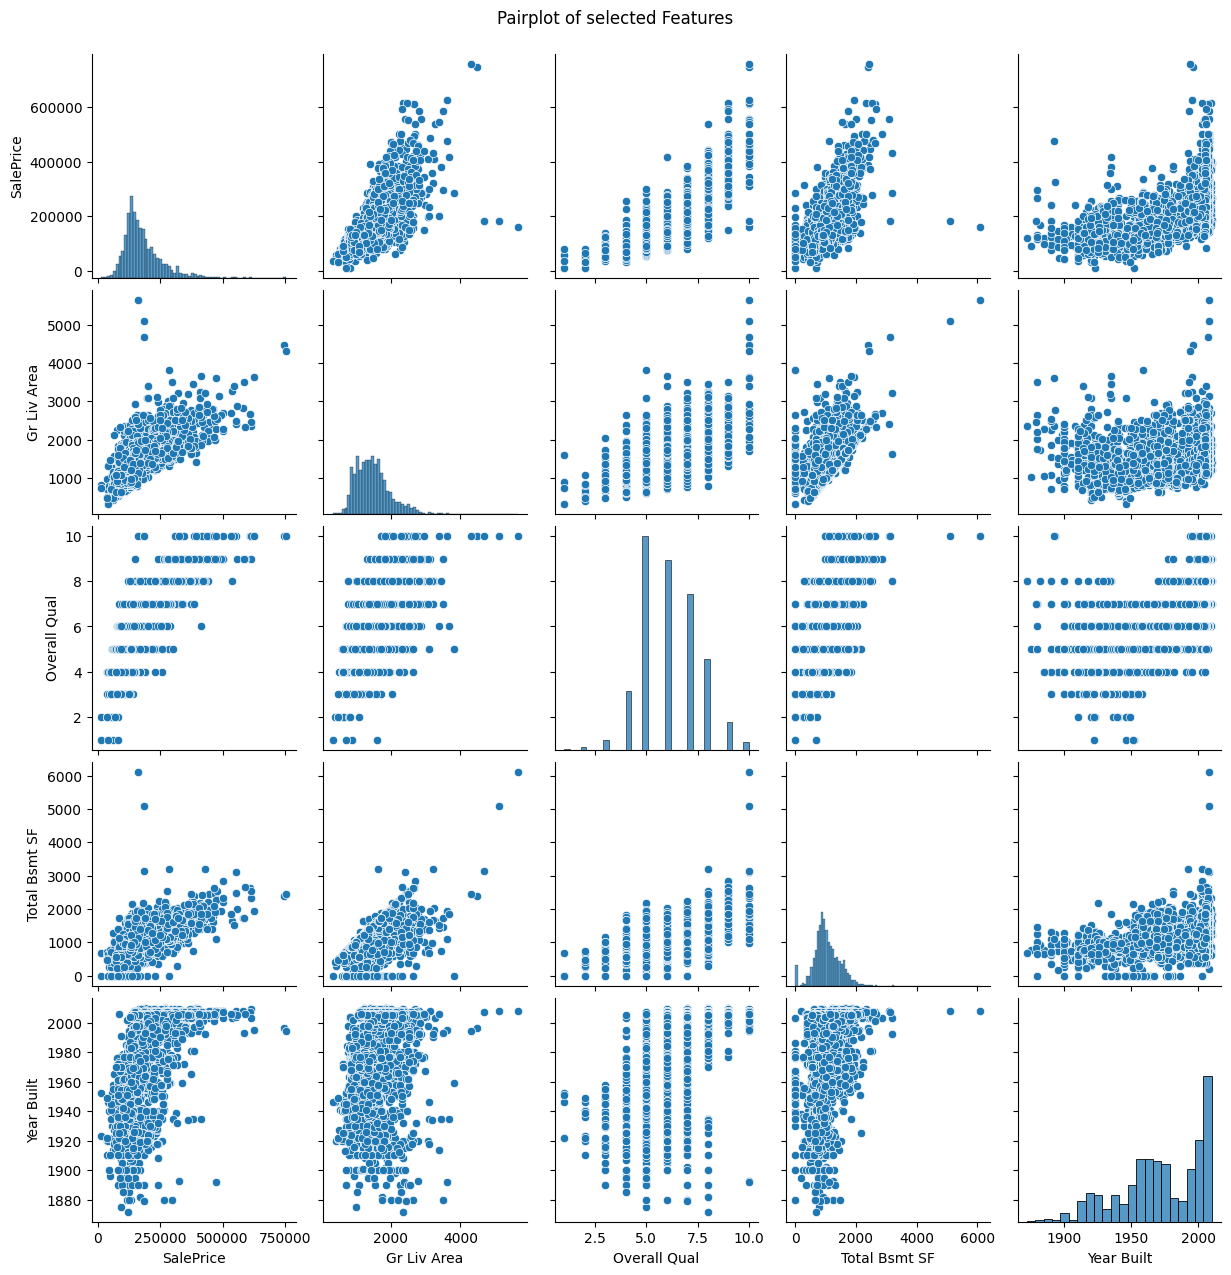

In [26]:
multivariate_Analyzer.analyze(selected_features)

# EDA Insights

### Columns with high Null values
1. Alley             2732
2. Mas Vnr Type      1775
3. Fireplace Qu      1422
4. Pool QC           2917
5. Fence             2358
6. Misc Feature      2824




### Univariate analysis

##### Numerical Features
- Sale prices are right-skewed with most homes between $100k-$200k
- Lot areas show extreme right skew with many outliers
- Living areas (Gr Liv Area) follow a roughly normal distribution
- Most homes have 2-4 bedrooms and 1-2 bathrooms
- Pool Area has near zero variance


##### Categorical Features
Features with very low variance (dominated by one category):

- Street (almost all "Pave")
- Utilities (almost all "AllPub")
- Condition 2 (mostly "Norm")
- Roof Matl (mostly "CompShg")

Features that might need encoding treatment:

- MS Zoning (7 categories)
- Neighborhood (28 categories)
- Exterior 1st and 2nd (16-17 categories)
- Sale Type (10 categories)


### Bivaraite Analysis

#### Numerical vs Numerical features
- YearBuilt Vs sale price
   - As Year Built increases (more recently built houses), Sale Price generally tends to be higher. This suggests that newer houses are more expensive, possibly due to modern designs, features, or better construction quality.
   - Compute the correlation coefficient between Year Built and Sale Price to quantify the relationship.
Given the trend, the correlation is likely positive but moderate.
- Total Bsmt SF Vs SalePrice
    - Total Basement Square Footage vs Sale Price shows a much stronger relationship
    - The correlation looks moderately strong, suggesting this could be a good predictor
- 1st Flr SF Vs SalePrice
    - Shows strong relationship
    - There is a linear increase in Sale Price with increase in the 1st Flr SF
- 2nd Flr SF Vs SalePrice
    - Clear positive correlation between 2nd floor size and sale price
    - The relationship appears roughly linear with increasing variance at larger sizes
    - Similar strength of relationship as Total Basement SF, making it a potentially good predictor
- Gr Liv Area vs SalePrice
    - Strong positive coorelation between Sale Price and  Gr Liv Area
    - Relationship appears mostly linear
- Garage Area Vs SalePrice
    - Strong Positive coorelation

#### Categorical vs Numerical Features

- Overall Qual Vs SalePrice
    - Clear positive Coorelation between Overall Qual vs SalePrice
